# Module 2: Data Analysis

## Sprint 4: Capstone Project

## About this Sprint

It is time for your second Capstone Project.
You will work on this project for the whole Sprint.

We are glad you have successfully reached the final Sprint of this Module.
You will put everything you have learned in this Module to work.
The outcome of this Sprint should potentially serve as your portfolio item, so try to show your best work!

The dataset for this Sprint is the Ultimate 25k+ Matches Football Database.
It is a large dataset, which will provide your with a lot of opportunities both for statistical inference and for prediction.
Once again you will not have concrete tasks or predefined questions - you'll have to be creative and crate a plan for yourself, how to explore the data.

You already had experience doing that while completing the capstone project for the Module 1.
In the industry it's your responsibility as a data scientist to come up with plans and hypothesis for the dataset, so this is an essential skill to practice.
Good luck!

## Objectives for this Part

- Practice identifying opportunities for data analysis, raising hypothesis, and formulating research tasks.
- Practice performing EDA, statistical inference, and prediction.
- Practice working with SQL datasets.
- Practice visualizing data.

## Data

**Ultimate 25k+ Matches Football Database**

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1489944440615-453fc2b6a9a9?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1482&q=80" /></div>

Imagine that you are a data scientist working in a sports betting company.
The business executives in your company after some initial analysis (they watched this video [Understanding European Soccer in Four Simple Steps: A Guide For Americans](https://www.youtube.com/watch?v=FZ4i3KX2CW4)) identified betting on soccer (European football) as an potential new business opportunity.
The problem is that your company doesn't know a lot about soccer (European football).
Your manager asked you to analyse this dataset and see if you can provide anything that could give us a competitive advantage in the attempt to start strong in the new endevor.
She has provided your with some questions, which she suggests are a good starting point for your analysis.

- Which leagues are in which countries?
- Which leagues score the most/fewest goals?
- Who are the top scorers in each team and league?
- Is there such a thing as home advantage?
- Can we predict how many goals each team will score in each match?
- Can we predict which team will win the match?

The link to the [Kaggle dataset is here](https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european).

## Requirements

- Perform data cleaning and feature engineering. Work with features - handle missing data if needed, use SQL and Pandas functions to create other additional features.
- Perform exploratory data analysis. Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data. Grouping the data and analyzing the groups - using SQL or Pandas aggregate methods. Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.
- Perform statistical inference. Raise and test statistical hypotheses. Set appropriate significance levels and create confidence intervals for the variables of interest.
- Train linear machine learning models and use them for forecasting. Use cross validation, information criteria, and/or other methods to specify your models correctly. Choose and use appropriate metrics to measure your models' performance.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Present the project - the data, methods, and results.
- Provide suggestions about how your analysis can be improved.

## Bonus Challenges

As a data scientists you will spend significant amount of your time learning new things.
Sometimes you will do that for fun, but most of the time you will have an urgent problem and you will need to quickly learn some new skill to be able to solve it.
It is very important to gradually build this skill - it is extremely valuable for all data scientists.
The bonus challenges are designed to simulate these types of situations.
These challenges require you to do something that we haven't covered in the course yet.
Instead of trying to do all of the bonus challenges, concentrate on just one or two and do them well.
All of the bonus challenges are optional - no points will be deducted if you skip them.

- Try dimensionality reduction algorithm (e.g. PCA, t-SNE, Autoencoder).
- Try clustering your data.
- Try a nonlinear machine learning model to explain relationships between features and predict new values.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?
- Delivery of the presentation. How clear are your reasoning and explanations?
- Bonus challenges. Have you put extra effort to do one or more of the bonus challenges (no points will be deducted if you skip them)?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

# Imports

In [1]:
pip install pysqlite3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 3.6 MB/s 
  Created wheel for pysqlite3: filename=pysqlite3-0.4.7-cp37-cp37m-linux_x86_64.whl size=132870 sha256=3761bd8d6cb0b8d8e4578bba6b5b75e57604945a79d0885adddd145e107ce8d2
  Stored in directory: /root/.cache/pip/wheels/e5/bf/e1/b92ae6794ca15c7dcc2b1f8068ebb3f86e6affa5c0fe5e8f40
Successfully built pysqlite3


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pysqlite3 as sql
import seaborn as sns
from seaborn.palettes import color_palette
from collections import Counter
import math
import numpy as np
import scipy as sp
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.compat import lzip
import warnings
from typing import Dict, List
from typing import TypeVar
from sklearn import preprocessing
from patsy.builtins import *

PandasDataFrame = TypeVar("pandas.core.frame.DataFrame")
PandasSeries = TypeVar("pd.core.series.Series")
AxesSubplot = TypeVar("matplotlib.axes._subplots.AxesSubplot")

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
conn = sql.connect("/content/drive/MyDrive/football/database.sqlite")

In [5]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.style.use('ggplot')
palette='CMRmap'
odds_palette='YlOrRd_r'

# Functions

In [6]:
def plot_labels(title: str, x_label=None, y_label=None):
    """This function sets the title and axes labels for a given plot."""
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [7]:
def show_values(
    axs: AxesSubplot, orient: str = "v", space: float = 0.05, decimals: int = 1, perc=False
):
    """This function adds value labels to the plot provided. The default plot
    orientation is vertical. To change it to horizontal pass orient='h'. The
    space parameter can be changed to control the position of the labels. The
    decimals parameter defines how many decimals are shown."""

    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + float(space)
                if perc==False:
                    value = "{:.{}f}".format(p.get_height(), decimals)
                    ax.text(_x, _y, value, ha="center")
                elif perc==True:
                    value = "{:.{}%}".format(p.get_height(), decimals)
                    ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.2)
                if perc==False:
                    value = "{:.{}f}".format(p.get_width(), decimals)
                    ax.text(_x, _y, value, ha="left")
                elif perc==True:
                    value = "{:.{}%}".format(p.get_width(), decimals)
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [8]:
def plot_axes(
    l_spine=False,
    r_spine=False,
    top_spine=False,
    bottom_spine=True,
    x_visible=False,
    y_visible=True,
):
    """This function sets visibility of the plots axes and spines."""
    plt.grid(visible=x_visible, axis="x")
    plt.grid(visible=y_visible, axis="y")
    ax.spines["right"].set_visible(r_spine)
    ax.spines["top"].set_visible(top_spine)
    ax.spines["left"].set_visible(l_spine)
    ax.spines["bottom"].set_visible(bottom_spine)

In [9]:
def get_match_players(team: str) -> PandasDataFrame:
    """ The function results in a DataFrame containing player ids for either 
    home or away team (whichever is passed as a 'team' variable)."""
    team_plays = pd.melt(pd.concat([matches[['league_id', 'season', 'match_api_id','date', f'{team}_team_api_id']], 
                                    matches.filter(regex=(f"{team}_player_.*"))], axis=1), 
                         id_vars=['league_id', 'season', 'match_api_id', 'date', f'{team}_team_api_id'],
                         value_vars=list(matches.filter(regex=(f"{team}_player_.*")).columns)).rename(columns={f'{team}_team_api_id':'team_api_id'})
    team_plays['variable']=f'{team}_team'
    return team_plays

# EDA

In [10]:
pd.read_sql("""
SELECT COUNT(DISTINCT name) as league_count
FROM league 
""", 
conn)

,league_count
0,11


Each country has a soccer league. There are 11 such leagues in the database.

In [11]:
league_goals = pd.read_sql("""
SELECT league_name, AVG(goal_count) avg_goals
FROM (
    SELECT league.name as league_name, match.season season, 
    SUM(match.home_team_goal) + SUM(match.away_team_goal) goal_count
    FROM match
    JOIN league
    ON match.league_id=league.country_id
    GROUP BY season, league_name
    )
GROUP BY league_name
ORDER BY avg_goals DESC
""",
conn)

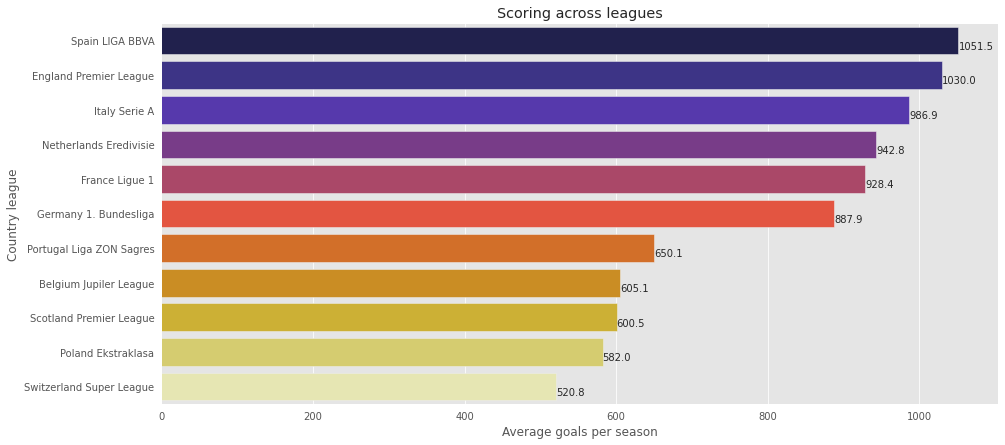

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))
avg_goals = sns.barplot(data=league_goals, y='league_name', x='avg_goals', palette=palette)
show_values(avg_goals, orient='h')
plot_labels('Scoring across leagues', 'Average goals per season', 'Country league');

On average, Spain league scored 1051.5 goals per season and ranks first among the European soccer leagues. The poorest scorring league is Switzerland with an average seasonal goal count of 520.75. 

## TOP teams

In [13]:
matches = pd.read_sql("""SELECT * FROM match""", conn)
leagues = pd.read_sql("""SELECT * FROM league""", conn)

home_plays = get_match_players('home')
away_plays = get_match_players('away')
match_players =pd.merge(
    pd.concat([home_plays, away_plays], axis=0).rename(columns={'value':'player_id'}).dropna(), 
    pd.read_sql('SELECT * from team', conn), 
    left_on='team_api_id', 
    right_on='team_api_id')

In [14]:
home_goals = pd.concat([matches.iloc[:,:8], matches.home_team_goal], axis=1).rename(columns={'home_team_api_id':'team_id', 'home_team_goal': 'team_score'})
away_goals = pd.concat([matches.iloc[:,:7], matches[['away_team_api_id', 'away_team_goal']]], axis=1).rename(columns={'away_team_api_id':'team_id', 'away_team_goal':'team_score'})
team_scores = pd.concat([home_goals, away_goals], axis=0)
team_scores = pd.DataFrame(team_scores.groupby(['league_id', 'season', 'team_id']).sum().to_records())

In [15]:
max_season_scores = pd.DataFrame(team_scores.groupby(['league_id', 'season']).max()[['team_id', 'team_score']].to_records())
max_season_scores = pd.merge(max_season_scores, pd.read_sql('SELECT * from team', conn), left_on='team_id', right_on='team_api_id')[['league_id', 'season', 'team_id', 'team_long_name', 'team_score']]
max_season_scores = pd.merge(max_season_scores, leagues, left_on='league_id', right_on='id').rename(columns={'name':'league_name'})

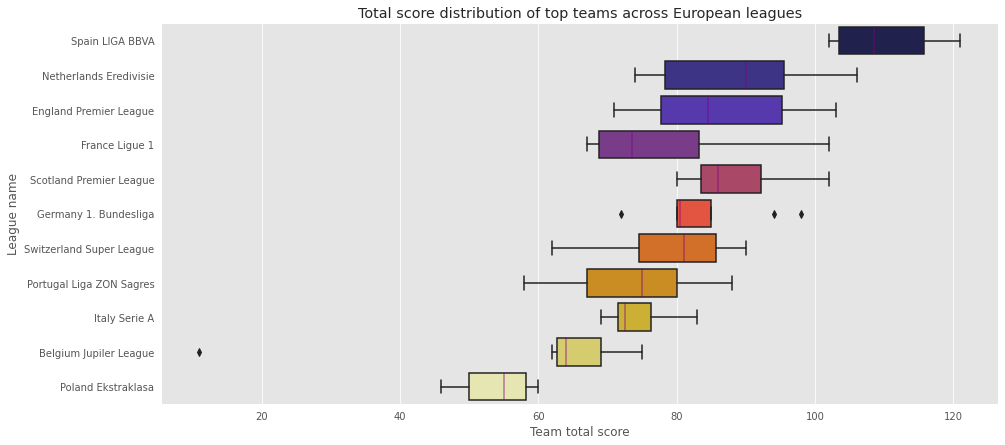

In [16]:
fig, ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=max_season_scores.sort_values('team_score', ascending=False), y='league_name', x='team_score', palette=palette, medianprops=dict(color="purple", alpha=0.5))
plot_labels('Total score distribution of top teams across European leagues','Team total score', 'League name');

In [17]:
max_season_scores.team_score.mean()

79.54545454545455

On average a top scoring team's result is 79.5 goals per season. However, the distribution of the scores is actually quite varied across European leagues: all of top scoring teams in the Spannish league score above 100 goals per season while the Polish league scored only between 46 to 60 goals.

## TOP players

Each player is also given a performance indicator - rating - that is based on a unique, comprehensive statistical algorithm, calculated live during the game. Every event of importance is taken into account, with a positive or negative effect on ratings weighted in relation to its area on the pitch and its outcome.

In [18]:
players = pd.read_sql("""
select * from player""", conn)

# Data cleaning to remove age? from name column
players['player_name'] = players.player_name.str.replace(',\d\d$', '', regex = True)
players.to_sql('players', conn, if_exists='replace')

In [19]:
pd.read_sql("""
SELECT p.player_api_id player_id, p.player_name name, MAX(pa.overall_rating) rating, 
    CASE 
        WHEN CAST(strftime('%m', pa.date) AS INTEGER)> 7  THEN strftime('%Y', pa.date)||'/'||(CAST(strftime('%Y', pa.date) AS INTEGER)+1)
        WHEN CAST(strftime('%m', pa.date) AS INTEGER) < 8 THEN (CAST(strftime('%Y', pa.date) AS INTEGER)-1)||'/'||strftime('%Y', pa.date)
        ELSE 1 END season
FROM players p
JOIN player_attributes pa
ON p.player_api_id=pa.player_api_id
GROUP BY season
ORDER BY season
""", conn)

,player_id,name,rating,season
0,30717,Gianluigi Buffon,93,2006/2007
1,30723,Alessandro Nesta,91,2007/2008
2,30893,Cristiano Ronaldo,91,2008/2009
3,30657,Iker Casillas,90,2009/2010
4,30981,Lionel Messi,90,2010/2011
5,30981,Lionel Messi,94,2011/2012
6,30981,Lionel Messi,94,2012/2013
7,30981,Lionel Messi,94,2013/2014
8,30981,Lionel Messi,93,2014/2015
9,30981,Lionel Messi,94,2015/2016


Between 2006 and 2016, Lionel Messi (forward) was ranked best six seasons in a row.

Another valuable metric is goal's scored by each player. The data for individual matches's goals is provided in raw XML strings, therefore parsing is needed before we can analyse it.

In [20]:
xml_data = matches[matches['goal'].notna()][['country_id', 'season','match_api_id', 'date','goal']]

In [21]:
xml_data.goal.str.contains('<goal />').sum()

993

993 matches are still missing data about goals, so these will also be dropped.

In [22]:
xml_data = xml_data[~(xml_data.goal.str.contains('<goal />'))]
len(xml_data)

13224

Unfortunately, a lot of exact goal data is missing from the database. The data at hand describes goals from 13 224 matches.

In [23]:
goals = [pd.read_xml(xml_data['goal'][row]).set_index(pd.Series(xml_data['match_api_id'][row]).repeat(len(pd.read_xml(xml_data['goal'][row])))) for row in xml_data.index]
goals_df=pd.concat(goals, axis=0)
goals_df = goals_df.reset_index().rename(columns={'index':'match_api_id'})

In [24]:
match_goal_data = pd.merge(matches.iloc[:, 2:7], goals_df, on='match_api_id')
player_score_counts = match_goal_data.groupby(['league_id', 'season', 'player1']).count()['date']

In [138]:
player_score_data = pd.merge(
    pd.DataFrame(player_score_counts).reset_index().rename(columns={'date':'score'}), 
    leagues, 
    left_on='league_id', 
    right_on='id'
    ).rename(columns={'name':'league_name'})
player_score_data = player_score_data.groupby(['league_name', 'season']).describe()[['score']].droplevel(level=0, axis=1).reset_index()

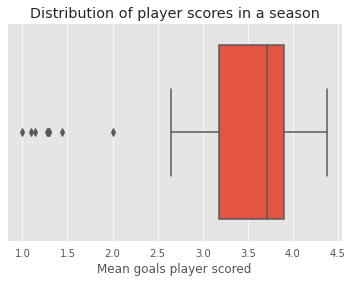

In [137]:
sns.boxplot(data = player_score_data, x='mean', palette=palette)
plot_labels('Distribution of player scores in a season', 'Mean goals player scored')

In [133]:
player_score_data.league_name.value_counts()

England Premier League      8
Germany 1. Bundesliga       8
Italy Serie A               8
Spain LIGA BBVA             8
France Ligue 1              6
Netherlands Eredivisie      6
Scotland Premier League     4
Poland Ekstraklasa          1
Switzerland Super League    1
Name: league_name, dtype: int64

The mean goals a players scores throughout the season varies from 1.0 to 4.39 across leagues. However, not all season records are present in some leagues: the Polans Ekstraklasa and Switzerland Super league have data from only 1 season, France, Netherlands, and Scotland leagues data is also incomplete. The missing data results in the outliers at the lower range. Thus drawing conclusions from this data is quite problematic if we were to compare all of European leagues.

In [25]:
player = pd.read_sql("""SELECT * FROM player""", conn)
top_scorers = pd.merge(player_score_counts.groupby(level=[0,1]).head(1).reset_index(), player, left_on='player1', right_on='player_api_id').rename(columns={'date':'total_goals'})

In [89]:
top_scorers

,league_id,season,player1,total_goals,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1729,2008/2009,3520.0,6,769,3520,Andrey Arshavin,147777,1981-05-29 00:00:00,172.72,154
1,1729,2009/2010,3520.0,11,769,3520,Andrey Arshavin,147777,1981-05-29 00:00:00,172.72,154
2,1729,2010/2011,3520.0,6,769,3520,Andrey Arshavin,147777,1981-05-29 00:00:00,172.72,154
3,1729,2011/2012,3520.0,1,769,3520,Andrey Arshavin,147777,1981-05-29 00:00:00,172.72,154
4,1729,2012/2013,2802.0,3,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159
5,1729,2013/2014,2802.0,2,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159
6,21518,2008/2009,2802.0,3,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159
7,21518,2009/2010,2802.0,5,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159
8,21518,2010/2011,2802.0,5,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159
9,21518,2015/2016,2802.0,3,8249,2802,Pablo Hernandez,179591,1985-04-11 00:00:00,172.72,159


## Matches analysis

In [26]:
matches_info = matches.loc[:, :'away_team_goal']

In [27]:
conditions = [matches.home_team_goal < matches.away_team_goal, 
              matches.home_team_goal > matches.away_team_goal,
              matches.home_team_goal == matches.away_team_goal]

values = ['away win', 'home win', 'draw']
matches_info['outcome'] = np.select(conditions, values)

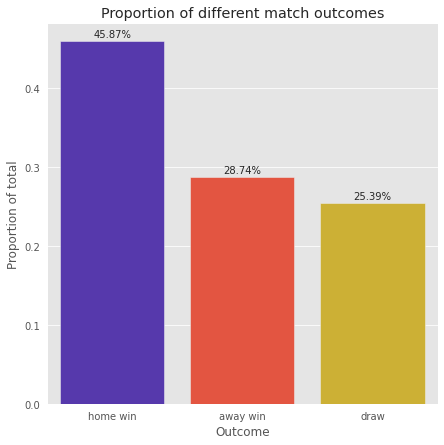

In [28]:
fig, ax=plt.subplots(figsize=(7,7))
g = sns.barplot(x=matches_info.outcome.value_counts(normalize=True).index, y=matches_info.outcome.value_counts(normalize=True).values, palette=palette)
show_values(g, perc=True, space=0.005, decimals=2)
plot_labels('Proportion of different match outcomes', 'Outcome', 'Proportion of total')

**Home advantage**. The home team wins 45.87% of the time, whereas the away team wins or the match results in a draw 28.73% and 25.39% of the time respectively.

### Betting odds

Beside match metrics, the table also contains betting odds from different betting companies.

In [85]:
odds = matches.loc[:, 'B365H':'BSA']

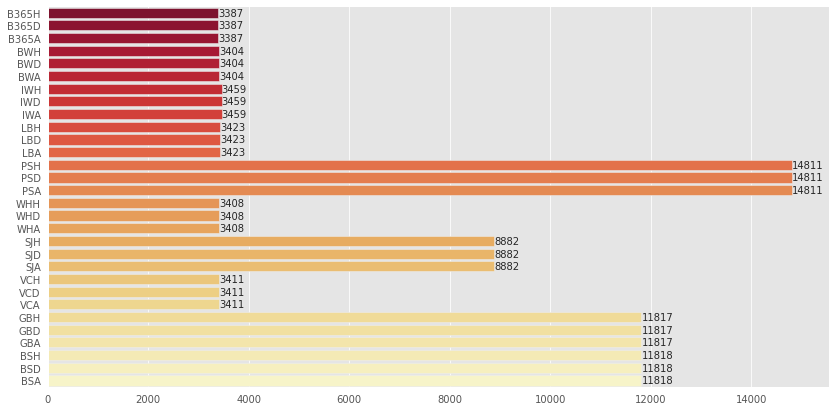

In [86]:
fig, ax=plt.subplots(figsize=(14, 7))
odd_nans = sns.barplot(y=odds.isna().sum().index, x=odds.isna().sum().values, palette=odds_palette)
show_values(odd_nans, orient='h', decimals=0)

Some betting companies provide more information than others (e.g. the Pinnacle Sports (PS) betting company is missing odds for 14811 matches). Most betting companies miss data from around 3400 matches. It is worth investigating if the values are missing for the same matches/leagues in all of these betting companies.

In [88]:
odds_index=[(odds.columns[col][:-1], odds.columns[col][-1]) for col in range(len(odds.columns))]
odds.columns = pd.MultiIndex.from_tuples(odds_index, names=["company", "outcome"])
# odds

To anlyze how many matches contain betting odds, the table is grouped by the betting company name and every match instance is counted.

In [83]:
league_odds = pd.concat([odds.groupby(level=[0], axis=1).count(), matches.league_id], axis=1).replace(3,1)
pd.merge(league_odds.groupby('league_id').sum(), leagues, left_on='league_id', right_on='id').set_index('name').drop(columns=['id', 'country_id'])

,B365,BS,BW,GB,IW,LB,PS,SJ,VC,WH
name,,,,,,,,,,
Belgium Jupiler League,1706,1218,1705,1222,1698,1694,710,1282,1706,1704
England Premier League,3040,1900,3039,1899,3038,3039,1519,2320,3040,3040
France Ligue 1,3036,1897,3037,1897,3034,3035,1519,2323,3037,3036
Germany 1. Bundesliga,2447,1528,2447,1528,2442,2447,1223,1860,2447,2447
Italy Serie A,3011,1861,2996,1864,2990,3009,1514,2263,2993,3006
Netherlands Eredivisie,2445,1526,2445,1527,2435,2439,1194,1877,2441,2437
Poland Ekstraklasa,0,0,0,0,0,0,0,0,0,0
Portugal Liga ZON Sagres,2044,1192,2043,1192,2028,2033,1074,1462,2043,2038
Scotland Premier League,1824,1140,1824,1140,1819,1822,898,1402,1823,1824


The table above shows how many matches contained betting data in each league. Poland Ekstraklasa and Switzerland Super League are missing this data altogether.